In [1]:
import cv2
from google.colab.patches import cv2_imshow
img1=cv2.resize(cv2.imread('/content/building1.png'),[224,224])
img2=cv2.resize(cv2.imread('/content/building2.png'),[224,224])
img3=cv2.resize(cv2.imread('/content/img_leo1.png'),[224,224])
img4=cv2.resize(cv2.imread('/content/img_leo2.png'),[224,224])

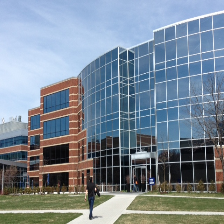

In [2]:
cv2_imshow(img1)

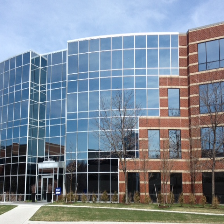

In [3]:
cv2_imshow(img2)

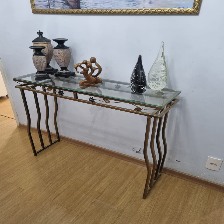

In [4]:
cv2_imshow(img3)

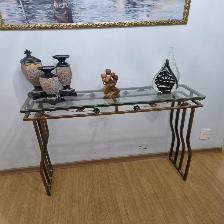

In [5]:
cv2_imshow(img4)

Sift Descriptor

In [6]:
keypoints=[]
descriptors=[]
for image in [img1,img2,img3,img4]:
  sift = cv2.xfeatures2d.SIFT_create()
  keypoints_temp, descriptors_temp = sift.detectAndCompute(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None)
  keypoints.append(keypoints_temp)
  descriptors.append(descriptors_temp)

In [7]:
def bf_knn(img_1,img_2,desc_1,desc_2,kp_1,kp_2,coef,resize_=False):
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(desc_1, desc_2, k=2)

  good = []
  for m,n in matches:
    if m.distance < coef*n.distance:
      good.append(m)
  print(len(good))
  match_image = cv2.drawMatches(img_1, kp_1, img_2, kp_2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  if resize_:
    match_image=cv2.resize(match_image,(0,0),fx=2,fy=2)
  cv2_imshow(match_image)

43


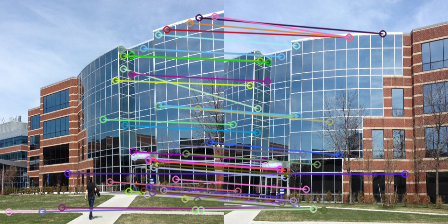

In [8]:
bf_knn(img1,img2,descriptors[0],descriptors[1],keypoints[0],keypoints[1],0.75)

25


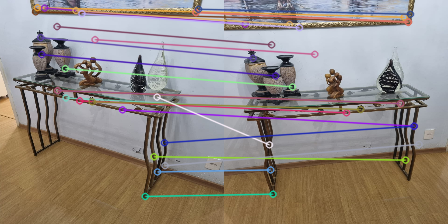

In [9]:
bf_knn(img3,img4,descriptors[2],descriptors[3],keypoints[2],keypoints[3],0.75)

Neural network descriptor

In [10]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow

base_model = VGG16(weights='imagenet')
model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_pool').output)
model2 = Model(inputs=base_model.get_layer('block3_pool').output, outputs=base_model.get_layer('block4_pool').output)
model3 = Model(inputs=base_model.get_layer('block4_pool').output, outputs=base_model.get_layer('block5_pool').output)

x = preprocess_input(np.expand_dims(img1, axis=0))
desc1_img1=model1.predict(x)
desc2_img1=model2.predict(desc1_img1)
desc3_img1=model3.predict(desc2_img1)


x = preprocess_input(np.expand_dims(img2, axis=0))
desc1_img2=model1.predict(x)
desc2_img2=model2.predict(desc1_img2)
desc3_img2=model3.predict(desc2_img2)

x = preprocess_input(np.expand_dims(img3, axis=0))
desc1_img3=model1.predict(x)
desc2_img3=model2.predict(desc1_img3)
desc3_img3=model3.predict(desc2_img3)

x = preprocess_input(np.expand_dims(img4, axis=0))
desc1_img4=model1.predict(x)
desc2_img4=model2.predict(desc1_img4)
desc3_img4=model3.predict(desc2_img4)

#pool3 -> 8x8 grid, 224/8 -> 28
print('check feature 1',desc1_img1.shape)
#pool4 -> 16x16 grid, 224/16 -> 14
print('check feature 2',desc2_img1.shape)
#pool5 -> 32x32 grid, 224/32 -> 7
print('check feature 3',desc3_img1.shape)

key_list=[]

1/1 [==============================] - 0s 77ms/step
check feature 1 (1, 28, 28, 256)
check feature 2 (1, 14, 14, 512)
check feature 3 (1, 7, 7, 512)


#Desc Pool 3

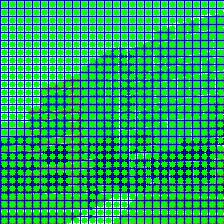

In [11]:
img_keys=img1.copy()
img_key_final=img1.copy()
width=224
height=224
img_pool3=img1.copy()
grid_size=28
step_size_x = width // grid_size
step_size_y = height // grid_size

for x in range(0, width, step_size_x):
    cv2.line(img_pool3, (x, 0), (x, height), color=(255, 0, 0), thickness=1)

for y in range(0, height, step_size_y):
    cv2.line(img_pool3, (0, y), (width, y), color=(255, 0, 0), thickness=1)

for x in range(step_size_x // 2, width, step_size_x):
    for y in range(step_size_y // 2, height, step_size_y):
        cv2.circle(img_pool3, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
        cv2.circle(img_keys, (x, y), radius=3, color=(255, 0, 0), thickness=-1)
        cv2.circle(img_key_final, (x, y), radius=3, color=(255, 0, 0), thickness=-1)
        key_list.append([x,y])

cv2_imshow(img_pool3)

# Desc Pool 4

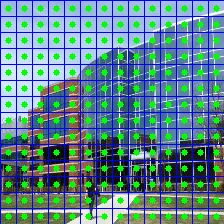

In [12]:
width=224
height=224
img_pool4=img1.copy()
grid_size=14
step_size_x = width // grid_size
step_size_y = height // grid_size

for x in range(0, width, step_size_x):
    cv2.line(img_pool4, (x, 0), (x, height), color=(255, 0, 0), thickness=1)

for y in range(0, height, step_size_y):
    cv2.line(img_pool4, (0, y), (width, y), color=(255, 0, 0), thickness=1)

for x in range(step_size_x // 2, width, step_size_x):
    for y in range(step_size_y // 2, height, step_size_y):
        cv2.circle(img_pool4, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
        cv2.circle(img_keys, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
cv2_imshow(img_pool4)

#Desc Pool 5

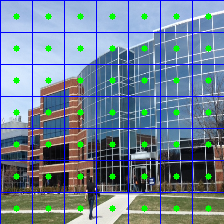

In [13]:
width=224
height=224
img_pool5=img1.copy()
grid_size=7
step_size_x = width // grid_size
step_size_y = height // grid_size

for x in range(0, width, step_size_x):
    cv2.line(img_pool5, (x, 0), (x, height), color=(255, 0, 0), thickness=1)

for y in range(0, height, step_size_y):
    cv2.line(img_pool5, (0, y), (width, y), color=(255, 0, 0), thickness=1)

for x in range(step_size_x // 2, width, step_size_x):
    for y in range(step_size_y // 2, height, step_size_y):
        cv2.circle(img_pool5, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
        cv2.circle(img_keys, (x, y), radius=3, color=(0, 0, 255), thickness=-1)
cv2_imshow(img_pool5)

#Combinações pontos

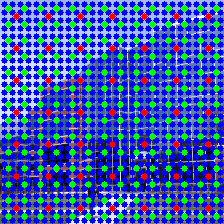

In [14]:
cv2_imshow(img_keys)

#Distancia testes

In [15]:
test=np.kron(desc2_img1, np.ones((2, 2, 1)))
test2=np.kron(desc3_img1, np.ones((4, 4, 1)))
print(desc1_img1.shape)
print(test.shape)
print(test2.shape)


(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)


A ideia é jogar todos para a distribuição de pontos do pool 3 (28x28 grids de 8 por 8 pixels)

#Pontos candidatos finais

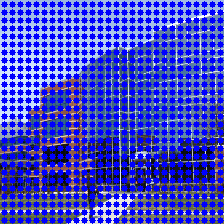

In [16]:
cv2_imshow(img_key_final)

# juntando os descritores em um único descritor
# propostos 2 métodos

## método 1 - Descritor com NN
Janela dos descritores transformadas em grids 8x8 (com np.kron) e somados (com flatten nos descritores e padding no descritor de menor dimensão). Os descritores também foram normalizados para evitar que as informações de um recebam uma priorização maior por efeitos de escala.


## método 2 - seria utilizar o mesmo descritor desenvolvido no 1 método
Substituir o descritor do sift pelo descritor gerado no método 1 transferindo as coordenadas X,Y pelas coordenadas do quadrado 8 por 8 pixels que os contem. Seria o método 1, só que descrevendo apenas os quadrados que contem os pontos levantados pelo sift ao invés de todos.


In [17]:
teste_novo=np.reshape(desc1_img1, [-1, 256])
print(teste_novo.shape)
teste_novo=np.kron(desc2_img1, np.ones((2, 2, 1)))
teste_novo=np.reshape(teste_novo, [-1, 512])
print(teste_novo.shape)
teste_novo=np.kron(desc3_img1, np.ones((4, 4, 1)))
teste_novo=np.reshape(teste_novo, [-1, 512])
print(teste_novo.shape)

(784, 256)
(784, 512)
(784, 512)


In [18]:
def ajustar_distancias(desc1,desc2,desc3):
  desc1=np.reshape(desc1,[-1,256])
  desc1=desc1/np.std(desc1)

  desc2=np.kron(desc2, np.ones((2, 2, 1)))
  desc2=np.reshape(desc2, [-1, 512])
  desc2=desc2/np.std(desc2)

  desc3=np.kron(desc3, np.ones((4, 4, 1)))
  desc3=np.reshape(desc3, [-1, 512])
  desc3=desc3/np.std(desc3)
  return desc1,desc2,desc3

In [19]:
d1_img1, d2_img1, d3_img1 =ajustar_distancias(desc1_img1,desc2_img1,desc3_img1)
d1_img2, d2_img2, d3_img2 =ajustar_distancias(desc1_img2,desc2_img2,desc3_img2)
d1_img3, d2_img3, d3_img3 =ajustar_distancias(desc1_img3,desc2_img3,desc3_img3)
d1_img4, d2_img4, d3_img4 =ajustar_distancias(desc1_img4,desc2_img4,desc3_img4)

In [20]:
print(d1_img1[0].shape,d2_img1[0].shape,d3_img1[0].shape)

(256,) (512,) (512,)


#Método 1
#a soma dos descritores parece ter funcionado bem

In [21]:
d_unido_img1=np.pad(d1_img1, ((0, 0), (0, 512 - 256)))+d2_img1+d3_img1
d_unido_img2=np.pad(d1_img2, ((0, 0), (0, 512 - 256)))+d2_img2+d3_img2
d_unido_img1=d_unido_img1.astype(np.float32)
d_unido_img2=d_unido_img2.astype(np.float32)

d_unido_img3=np.pad(d1_img3, ((0, 0), (0, 512 - 256)))+d2_img3+d3_img3
d_unido_img4=np.pad(d1_img4, ((0, 0), (0, 512 - 256)))+d2_img4+d3_img4
d_unido_img3=d_unido_img3.astype(np.float32)
d_unido_img4=d_unido_img4.astype(np.float32)

In [22]:
def bf_knn_nn(img_1,img_2,desc_1,desc_2,coef,key_list=key_list,resize_=False):
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(desc_1, desc_2, k=2)

  good = []
  for m,n in matches:
    if m.distance < coef*n.distance:
      good.append(m)
  keypoints_lista = [cv2.KeyPoint(y, x, 8) for x, y in key_list]
  print(len(good))
  match_image = cv2.drawMatches(img_1, keypoints_lista, img_2, keypoints_lista, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  if resize_:
    match_image=cv2.resize(match_image,(0,0),fx=2,fy=2)
  cv2_imshow(match_image)

80


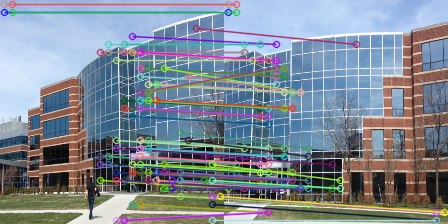

In [23]:
bf_knn_nn(img1,img2,d_unido_img1,d_unido_img2,0.95,key_list=key_list)

33


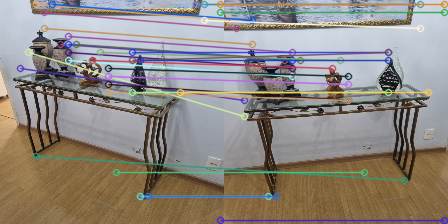

In [24]:
bf_knn_nn(img3,img4,d_unido_img3,d_unido_img4,0.95,key_list=key_list)

#Método 2
#keypoints com sift

In [25]:
d_unido_img1.shape

novo_d_shape1=[]

def calcular_novo_descritor(desc,kp):
  novo_d = np.empty((0, desc.shape[1]))
  for key_point_inter in kp:
    x,y=key_point_inter.pt
    y_i=y//8
    x_i=x//8
    if y_i==0:
      INDEX=int(x_i)
    else:
      INDEX=int((y_i-1)*28+x_i)
    novo_d=np.vstack([novo_d,desc[INDEX]])
  print('shape novo descritor ',novo_d.shape,' | tamanho do keypoint ', len(kp))
  return(novo_d)


In [26]:
desc_img1_sift=calcular_novo_descritor(d_unido_img1,keypoints[0]).astype(np.float32)
desc_img2_sift=calcular_novo_descritor(d_unido_img2,keypoints[1]).astype(np.float32)
desc_img3_sift=calcular_novo_descritor(d_unido_img3,keypoints[2]).astype(np.float32)
desc_img4_sift=calcular_novo_descritor(d_unido_img4,keypoints[3]).astype(np.float32)

shape novo descritor  (412, 512)  | tamanho do keypoint  412
shape novo descritor  (396, 512)  | tamanho do keypoint  396
shape novo descritor  (322, 512)  | tamanho do keypoint  322
shape novo descritor  (339, 512)  | tamanho do keypoint  339


51


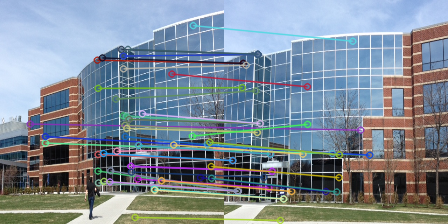

In [27]:
bf_knn(img1,img2,desc_img1_sift,desc_img2_sift,keypoints[0],keypoints[1],0.95,False)

43


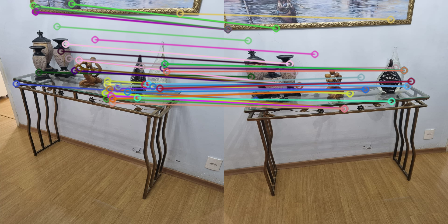

In [28]:
bf_knn(img3,img4,desc_img3_sift,desc_img4_sift,keypoints[2],keypoints[3],0.95,False)